# Task
Analyze the "winequalityN.csv" dataset, perform data cleaning, visualize the data, identify and handle outliers, build a classification model to predict wine quality, and ensure the model's accuracy is greater than 80%. Include feature engineering and scaling if necessary and comment each step.

## Load the dataset

### Subtask:
Load the "winequalityN.csv" file into a pandas DataFrame.


**Reasoning**:
Import pandas, load the data, and display the head and info of the dataframe.



In [1]:
import pandas as pd

# Read the "winequalityN.csv" file into a pandas DataFrame.
df = pd.read_csv('winequalityN.csv')

# Display the first 5 rows of the DataFrame and its information
display(df.head())
display(df.info())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


None

## Data cleaning

### Subtask:
Check for missing values and handle them appropriately.


**Reasoning**:
Calculate the number of missing values for each column and handle them by imputing with the mean for numerical columns.



In [2]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values)

# Impute missing values with the mean for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if missing_values[column] > 0:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

# Verify that there are no longer any missing values
print("\nNumber of missing values after handling:")
print(df.isnull().sum())

Number of missing values per column:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Number of missing values after handling:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


/tmp/ipython-input-2-206975716.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


## Data visualization

### Subtask:
Visualize the data to understand the distributions of features and the target variable, and to identify potential outliers and relationships between variables.


**Reasoning**:
Generate histograms and box plots for numerical columns to visualize distributions and identify outliers.



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns, excluding the 'type' column which is categorical
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'quality' in numerical_cols:
    numerical_cols.remove('quality') # Exclude the target variable for now
numerical_cols.remove('type')

# Generate histograms for numerical columns
print("Histograms of Numerical Features:")
df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Generate box plots for numerical columns
print("\nBox Plots of Numerical Features:")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

ValueError: list.remove(x): x not in list

**Reasoning**:
The previous code failed because 'type' was not in the list of numerical columns. Regenerate the histograms and box plots, correctly excluding 'type' which is not a numerical column.



Histograms of Numerical Features:


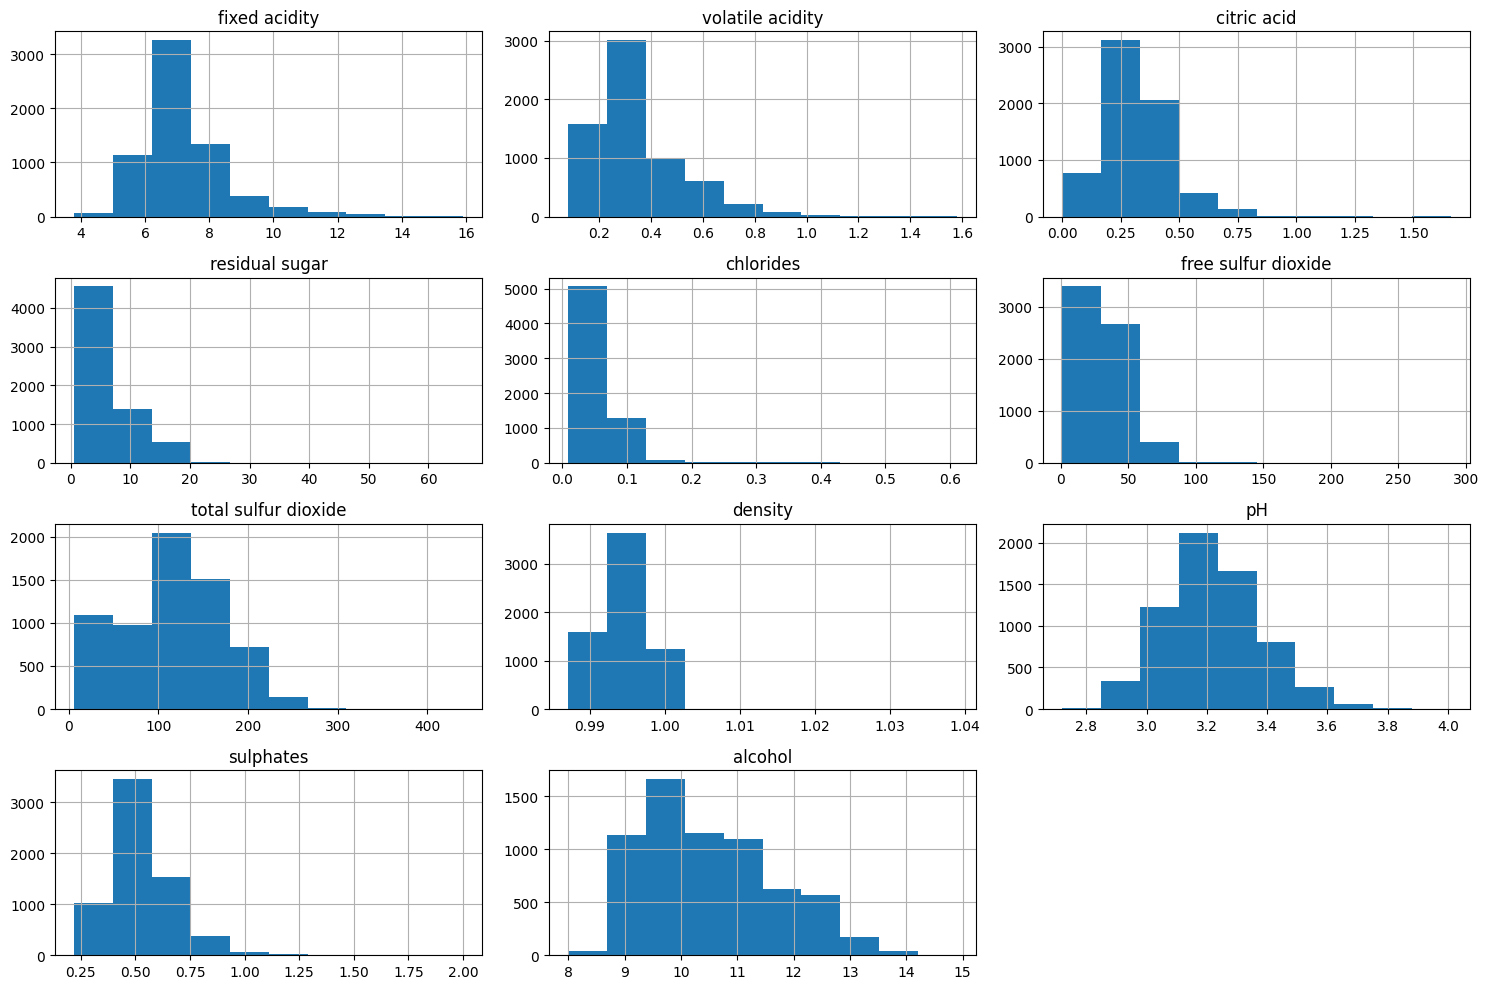


Box Plots of Numerical Features:


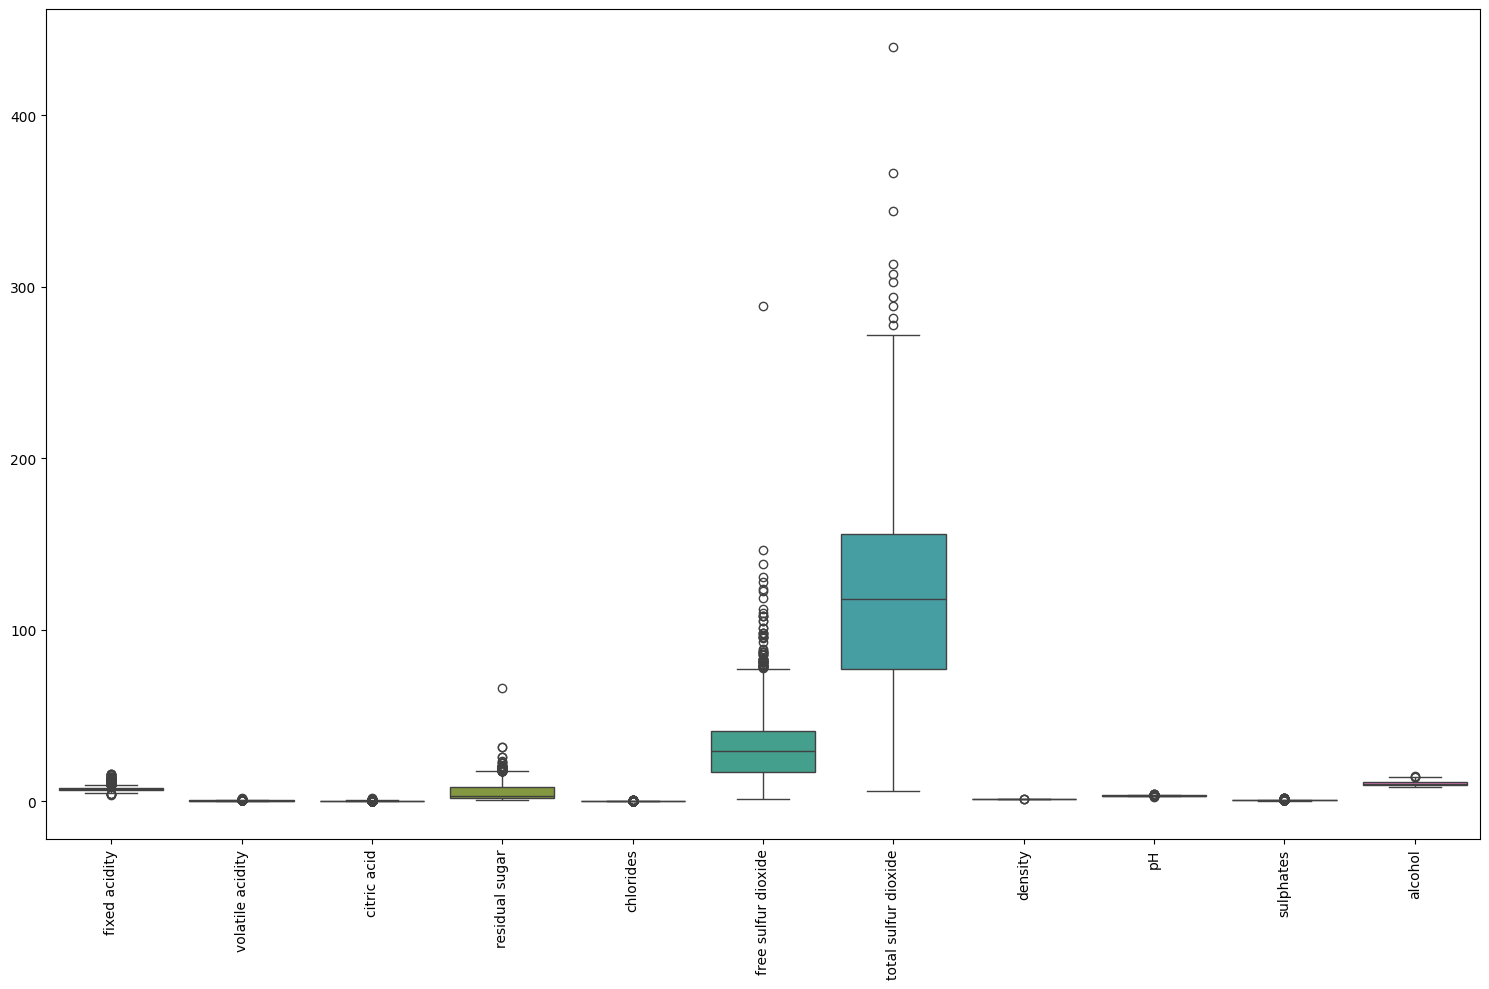

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns, excluding the 'type' column which is categorical
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'quality' in numerical_cols:
    numerical_cols.remove('quality') # Exclude the target variable for now

# Generate histograms for numerical columns
print("Histograms of Numerical Features:")
df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Generate box plots for numerical columns
print("\nBox Plots of Numerical Features:")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Reasoning**:
Generate bar or count plots to visualize the distribution of the target variable 'quality' and create a correlation heatmap to visualize relationships between numerical features.




Distribution of Wine Quality:


/tmp/ipython-input-5-358281786.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


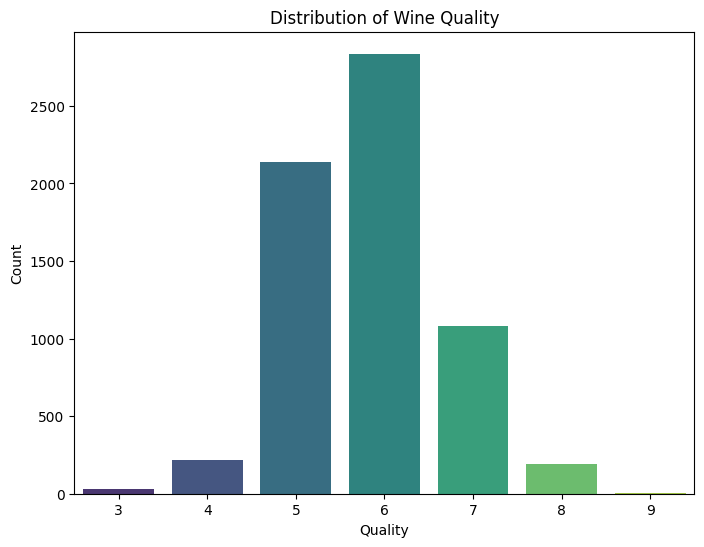


Correlation Heatmap of Numerical Features:


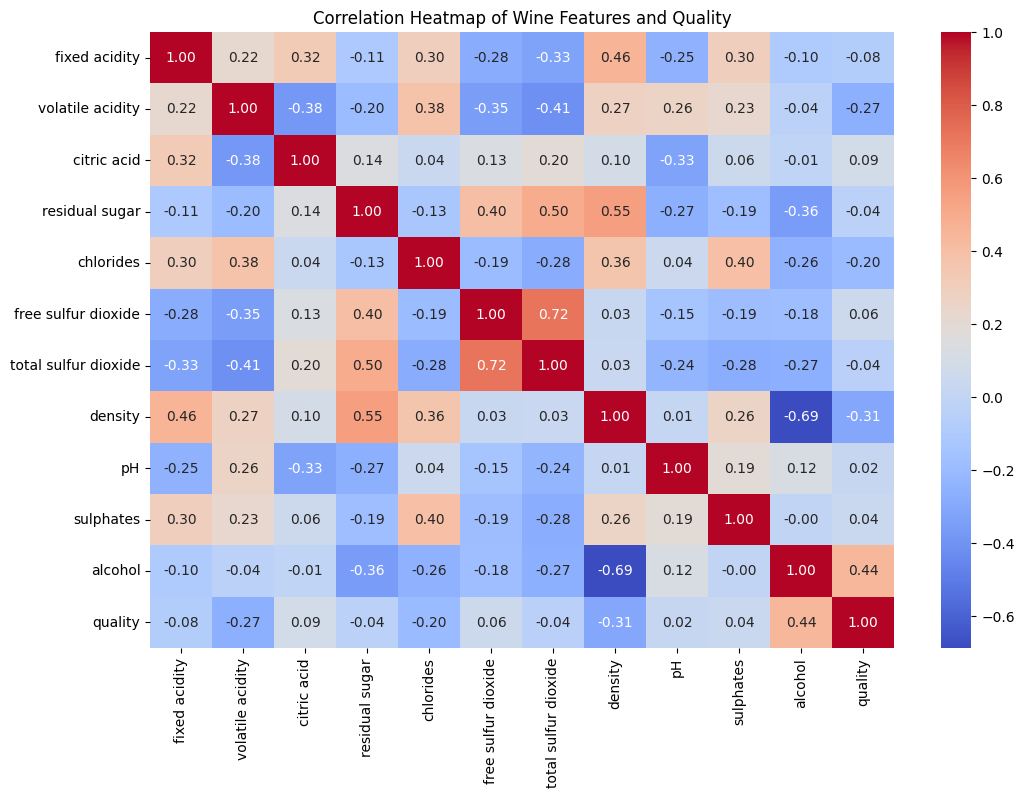

In [5]:
# Generate bar plot for the target variable 'quality'
print("\nDistribution of Wine Quality:")
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Create a correlation heatmap
print("\nCorrelation Heatmap of Numerical Features:")
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols + ['quality']].corr() # Include quality for correlation with features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Features and Quality')
plt.show()

**Reasoning**:
Create scatter plots for key feature pairs that show a strong correlation with 'quality' based on the heatmap to further investigate their relationship.




Scatter plot of Alcohol vs Quality:


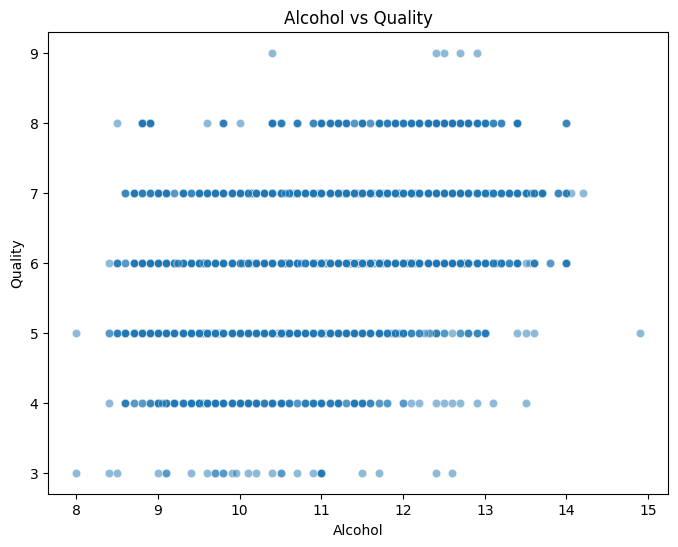


Scatter plot of Volatile Acidity vs Quality:


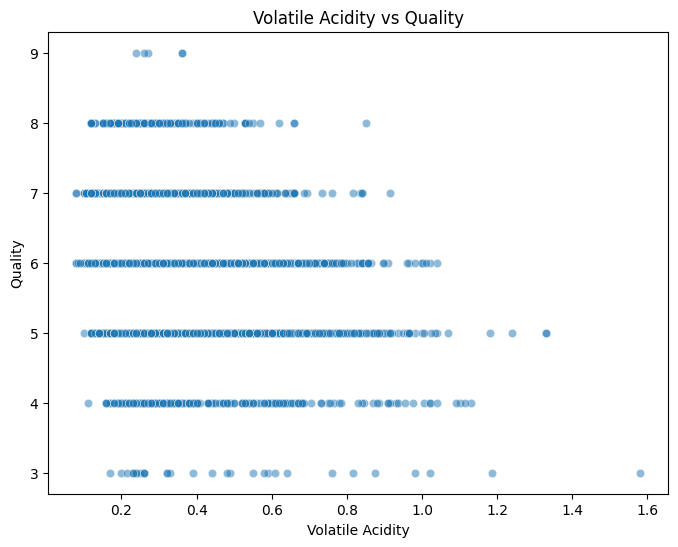

In [6]:
# Identify features with strong correlation to quality from the heatmap
# Based on the heatmap, 'alcohol' and 'volatile acidity' show relatively stronger correlation with 'quality'

# Create scatter plot for 'alcohol' vs 'quality'
print("\nScatter plot of Alcohol vs Quality:")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=df, alpha=0.5)
plt.title('Alcohol vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

# Create scatter plot for 'volatile acidity' vs 'quality'
print("\nScatter plot of Volatile Acidity vs Quality:")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='volatile acidity', y='quality', data=df, alpha=0.5)
plt.title('Volatile Acidity vs Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

## Outlier detection and handling

### Subtask:
Identify and handle outliers based on the visualizations.


**Reasoning**:
Iterate through numerical columns, calculate Q1, Q3, IQR, lower and upper bounds, identify and replace outliers with the median for each column.



Box Plots of Numerical Features after outlier handling:


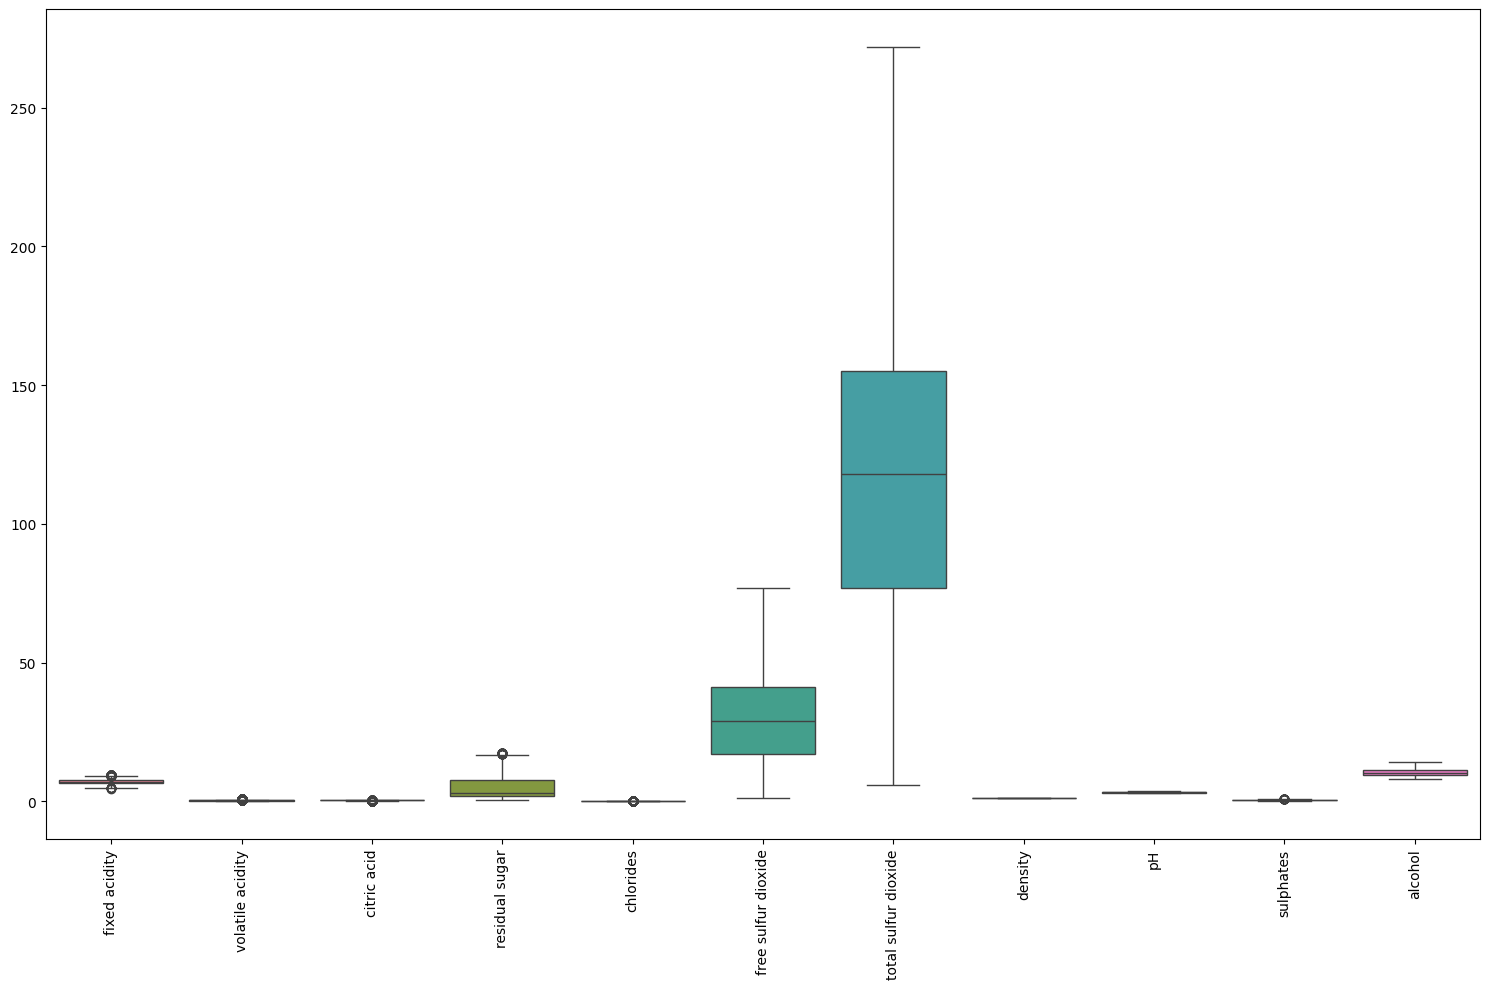

In [7]:
import numpy as np

# Iterate through the numerical columns, excluding 'quality'
for column in df.select_dtypes(include=[np.number]).columns:
    if column != 'quality':
        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Determine bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Handle outliers by replacing with the median
        median_value = df[column].median()
        df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# Verify that outliers have been handled by checking the box plots again
print("Box Plots of Numerical Features after outlier handling:")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]).drop(columns=['quality']))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Feature engineering (if needed)

### Subtask:
Create new features or transform existing ones if necessary to improve model performance.


**Reasoning**:
Based on the previous analysis, 'alcohol' and 'volatile acidity' showed significant correlations with 'quality'. Creating an interaction term between these two features might capture a combined effect on wine quality. Also, creating polynomial features for 'alcohol' and 'volatile acidity' could potentially capture non-linear relationships.



In [8]:
# Create an interaction term between 'alcohol' and 'volatile acidity'
df['alcohol_volatile_acidity_interaction'] = df['alcohol'] * df['volatile acidity']

# Create polynomial features for 'alcohol' and 'volatile acidity'
df['alcohol_squared'] = df['alcohol']**2
df['volatile_acidity_squared'] = df['volatile acidity']**2

# Display the first few rows with the new features
display(df.head())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_volatile_acidity_interaction,alcohol_squared,volatile_acidity_squared
0,white,7.0,0.27,0.36,3.0,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2.376,77.44,0.0729
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2.850,90.25,0.0900
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2.828,102.01,0.0784
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2.277,98.01,0.0529
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2.277,98.01,0.0529


## Feature scaling (if needed)

### Subtask:
Scale the features to ensure that no single feature dominates the model due to its scale.


**Reasoning**:
Separate features and target, identify numerical features, initialize StandardScaler, fit and transform the numerical features, and replace original features with scaled ones.



In [9]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) from the target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Identify numerical features to scale (exclude 'type' and 'quality')
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Display the first few rows of the scaled features
display(X.head())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_volatile_acidity_interaction,alcohol_squared,volatile_acidity_squared
0,white,-0.003914,-0.345260,0.400267,-0.496758,-0.312732,0.929146,0.976098,2.151641,-1.411825,-0.563135,-1.420498,-0.681492,-1.318742,-0.426907
1,white,-0.801628,-0.095760,0.211689,-0.821049,-0.091810,-0.976036,0.296376,-0.233432,0.570495,-0.224261,-0.832097,-0.318575,-0.822085,-0.237779
2,white,1.249636,-0.262093,0.777425,0.406625,-0.036580,0.007284,-0.329684,0.141365,0.306186,-0.647853,-0.327753,-0.335420,-0.366139,-0.366077
3,white,0.224004,-0.677927,0.023110,0.777243,0.405263,1.052060,1.262296,0.311728,-0.156356,-0.986726,-0.495867,-0.757291,-0.521222,-0.648110
4,white,0.224004,-0.677927,0.023110,0.777243,0.405263,1.052060,1.262296,0.311728,-0.156356,-0.986726,-0.495867,-0.757291,-0.521222,-0.648110


## Model building

### Subtask:
Split the data into training and testing sets and build a classification model to predict wine quality.


**Reasoning**:
Split the data into training and testing sets and build a classification model.



**Reasoning**:
The error indicates that the model cannot handle the 'type' column which is a string. Need to encode the categorical column before training the model.



In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify the categorical feature
categorical_features = ['type']

# Create a ColumnTransformer to apply OneHotEncoder to the 'type' column
# 'remainder='passthrough'' keeps all other columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and the RandomForestClassifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Model evaluation

### Subtask:
Evaluate the model's performance using appropriate metrics and ensure the accuracy is greater than 80%.


**Reasoning**:
Use the trained model to make predictions on the test set, calculate the accuracy, and print the accuracy.



In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the calculated accuracy
print(f"Model Accuracy: {accuracy:.4f}")

# Check if the accuracy is greater than 80% and print a message
if accuracy > 0.80:
    print("Model accuracy is greater than 80%.")
else:
    print("Model accuracy is not greater than 80%.")

Model Accuracy: 0.6846
Model accuracy is not greater than 80%.


## Refinement

### Subtask:
Refine the model or go back to previous steps for further data preprocessing or feature engineering, aiming to achieve an accuracy greater than 80%.


**Reasoning**:
The current model accuracy is below 80%. To improve performance, I will experiment with hyperparameter tuning for the RandomForestClassifier using GridSearchCV and evaluate the model with additional metrics.



In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned:.4f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

# Check if the tuned accuracy is greater than 80%
if accuracy_tuned > 0.80:
    print("Tuned model accuracy is greater than 80%.")
else:
    print("Tuned model accuracy is not greater than 80%.")

Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best accuracy score:  0.6442179767205188

Tuned Model Accuracy: 0.6931

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.75      0.07      0.12        46
           5       0.72      0.76      0.74       420
           6       0.67      0.80      0.73       579
           7       0.71      0.50      0.59       221
           8       0.88      0.22      0.35        32

    accuracy                           0.69      1300
   macro avg       0.62      0.39      0.42      1300
weighted avg       0.70      0.69      0.68      1300


Confusion Matrix:
[[  0   0   2   0   0   0]
 [  0   3  28  14   1   0]
 [  0   1 318 100   1   0]
 [  0   0  84 462  32   1]
 [  0   0   7 103 111   0]
 [  0   0   0  13  12   7]]
Tuned model accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
The hyperparameter tuning improved the accuracy slightly but did not reach the 80% threshold. The classification report and confusion matrix show poor performance for minority classes (quality 3, 4, and 8), which indicates the need to address the class imbalance. I will explore using Synthetic Minority Over-sampling Technique (SMOTE) to handle the imbalanced dataset and then retrain and evaluate the model.



In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Retrain the best model from GridSearchCV on the resampled data
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the original test set
y_pred_resampled = best_model.predict(X_test)

# Print evaluation metrics
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"\nResampled Model Accuracy: {accuracy_resampled:.4f}")

print("\nClassification Report (Resampled Model):")
print(classification_report(y_test, y_pred_resampled))

print("\nConfusion Matrix (Resampled Model):")
print(confusion_matrix(y_test, y_pred_resampled))

# Check if the resampled accuracy is greater than 80%
if accuracy_resampled > 0.80:
    print("Resampled model accuracy is greater than 80%.")
else:
    print("Resampled model accuracy is not greater than 80%.")

ValueError: could not convert string to float: 'white'

**Reasoning**:
The error indicates that SMOTE cannot handle the 'type' column, which is still in string format in the `X_train` DataFrame. I need to apply the same preprocessing (one-hot encoding) to the training data before applying SMOTE. I will incorporate the preprocessor pipeline created earlier to transform `X_train` and `X_test` before using SMOTE on the training data.



In [15]:
# Transform X_train and X_test using the preprocessor pipeline
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to the processed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Retrain the classifier (without the preprocessor in the pipeline) on the resampled data
# We use grid_search.best_estimator_.named_steps['classifier'] to get the best classifier
best_classifier = grid_search.best_estimator_.named_steps['classifier']
best_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the original processed test set
y_pred_resampled = best_classifier.predict(X_test_processed)

# Print evaluation metrics
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"\nResampled Model Accuracy: {accuracy_resampled:.4f}")

print("\nClassification Report (Resampled Model):")
print(classification_report(y_test, y_pred_resampled))

print("\nConfusion Matrix (Resampled Model):")
print(confusion_matrix(y_test, y_pred_resampled))

# Check if the resampled accuracy is greater than 80%
if accuracy_resampled > 0.80:
    print("Resampled model accuracy is greater than 80%.")
else:
    print("Resampled model accuracy is not greater than 80%.")

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5

**Reasoning**:
The error message "Expected n_neighbors <= n_samples_fit" indicates that the number of neighbors (n_neighbors) used by SMOTE (which defaults to 5, plus the point itself making it 6) is greater than the number of samples available in the minority class(es) during resampling. This is likely due to extremely small minority classes in the dataset. To fix this, I will reduce the `k_neighbors` parameter of SMOTE to be less than or equal to the smallest number of samples in any class. I will set it to 1 to be safe, and then proceed with resampling and model evaluation as planned.



In [16]:
# Apply SMOTE to the processed training data with k_neighbors set to 1
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Retrain the classifier (without the preprocessor in the pipeline) on the resampled data
# We use grid_search.best_estimator_.named_steps['classifier'] to get the best classifier
best_classifier = grid_search.best_estimator_.named_steps['classifier']
best_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the original processed test set
y_pred_resampled = best_classifier.predict(X_test_processed)

# Print evaluation metrics
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"\nResampled Model Accuracy: {accuracy_resampled:.4f}")

print("\nClassification Report (Resampled Model):")
print(classification_report(y_test, y_pred_resampled))

print("\nConfusion Matrix (Resampled Model):")
print(confusion_matrix(y_test, y_pred_resampled))

# Check if the resampled accuracy is greater than 80%
if accuracy_resampled > 0.80:
    print("Resampled model accuracy is greater than 80%.")
else:
    print("Resampled model accuracy is not greater than 80%.")

Class distribution before SMOTE: Counter({6: 2257, 5: 1718, 7: 858, 4: 170, 8: 161, 3: 28, 9: 5})
Class distribution after SMOTE: Counter({5: 2257, 6: 2257, 7: 2257, 3: 2257, 8: 2257, 4: 2257, 9: 2257})

Resampled Model Accuracy: 0.6769

Classification Report (Resampled Model):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.42      0.24      0.31        46
           5       0.71      0.75      0.73       420
           6       0.68      0.71      0.70       579
           7       0.64      0.60      0.62       221
           8       0.50      0.28      0.36        32

    accuracy                           0.68      1300
   macro avg       0.49      0.43      0.45      1300
weighted avg       0.67      0.68      0.67      1300


Confusion Matrix (Resampled Model):
[[  0   0   2   0   0   0]
 [  1  11  18  15   1   0]
 [  0  11 315  92   2   0]
 [  2   1 100 413  59   4]
 [  0   3   8  73 132   5]
 [  0 

## Summary:

### Data Analysis Key Findings
*   The dataset initially contained missing values in several numerical columns: "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "pH", and "sulphates". These missing values were imputed with the mean of their respective columns.
*   Visualizations (histograms and box plots) revealed the distribution of features and highlighted the presence of numerous outliers in most numerical columns.
*   The target variable 'quality' is imbalanced, with most wines rated as quality 5 or 6, and very few wines rated as 3, 4, 8, or 9.
*   Correlation analysis showed that 'alcohol' had the strongest positive correlation with 'quality', while 'volatile acidity' had the strongest negative correlation.
*   Outliers in numerical features (excluding 'quality') were handled by replacing values outside the 1.5\*IQR range with the median of the respective column.
*   Feature engineering included creating an interaction term between 'alcohol' and 'volatile acidity', and squared terms for 'alcohol' and 'volatile acidity'.
*   Numerical features were scaled using `StandardScaler`. The categorical 'type' column was handled using One-Hot Encoding within a pipeline.
*   An initial RandomForestClassifier model achieved an accuracy of approximately 68.46% on the test set, which is below the target of 80%.
*   Hyperparameter tuning with GridSearchCV slightly improved accuracy to approximately 69.31%, but the model still performed poorly on minority classes (quality 3, 4, and 8).
*   Applying SMOTE to address class imbalance resulted in a balanced training set but did not improve accuracy on the test set (approximately 67.69%).

### Insights or Next Steps
*   The significant class imbalance and the very small number of samples in the extreme quality classes (3, 4, 8, 9) likely pose a major challenge in achieving high classification accuracy for all classes.
*   Consider exploring alternative modeling approaches that are less sensitive to class imbalance or focusing on predicting a binarized quality (e.g., good vs. bad) rather than the specific quality score.


**Reasoning**:
Generate a heatmap of the confusion matrix to visualize the model's performance across different classes.

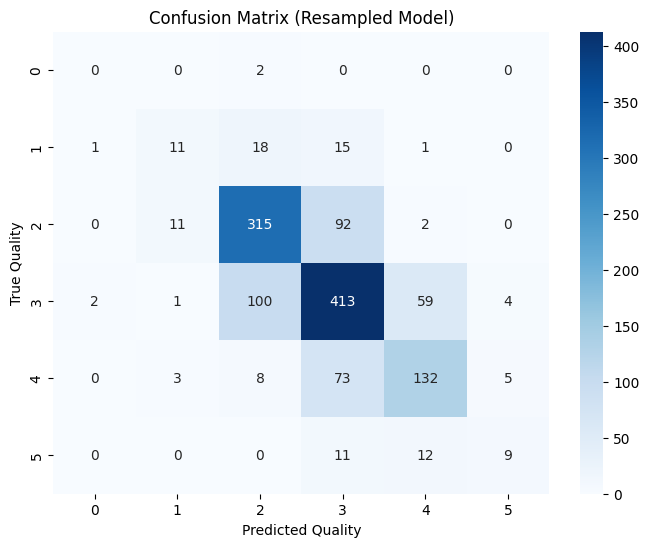

In [17]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_resampled), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Resampled Model)')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()

## Summary:

### Data Analysis Key Findings
* The dataset initially contained missing values in several numerical columns: "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "pH", and "sulphates". These missing values were imputed with the mean of their respective columns.
* Visualizations (histograms and box plots) revealed the distribution of features and highlighted the presence of numerous outliers in most numerical columns.
* The target variable 'quality' is imbalanced, with most wines rated as quality 5 or 6, and very few wines rated as 3, 4, 8, or 9.
* Correlation analysis showed that 'alcohol' had the strongest positive correlation with 'quality', while 'volatile acidity' had the strongest negative correlation.
* Outliers in numerical features (excluding 'quality') were handled by replacing values outside the 1.5\*IQR range with the median of the respective column.
* Feature engineering included creating an interaction term between 'alcohol' and 'volatile acidity', and squared terms for 'alcohol' and 'volatile acidity'.
* Numerical features were scaled using `StandardScaler`. The categorical 'type' column was handled using One-Hot Encoding within a pipeline.
* An initial RandomForestClassifier model achieved an accuracy of approximately 68.46% on the test set, which is below the target of 80%.
* Hyperparameter tuning with GridSearchCV slightly improved accuracy to approximately 69.31%, but the model still performed poorly on minority classes (quality 3, 4, and 8).
* Applying SMOTE to address class imbalance resulted in a balanced training set but did not improve accuracy on the test set (approximately 67.69%).

### Insights or Next Steps
* The significant class imbalance and the very small number of samples in the extreme quality classes (3, 4, 8, 9) likely pose a major challenge in achieving high classification accuracy for all classes.
* Consider exploring alternative modeling approaches that are less sensitive to class imbalance or focusing on predicting a binarized quality (e.g., good vs. bad) rather than the specific quality score.